DAY8 Assignments:
 
You build any either classification or regression model, where you should apply the below techniques and observe the performance,
 
    1.	Apply LDA 
    2.	Perform PCA
    3.	Gridsearch & GridsearchCV
    4.	Randamizedsearchcv
    5.	Feature scaling
    6.	Handling imbalance dataset
    7.	Apply cross validation 
    8.	K-Fold Cross validation
    9.	LOOCV
Compare the results and report the inferences 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
file_path = 'iris.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify the import
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 1.Apply LDA 

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate features and target variable
X = data.drop(['Id', 'Species'], axis=1)  
y = data['Species']

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2) 
X_lda = lda.fit_transform(X, y)

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(data=X_lda, columns=['LDA1', 'LDA2'])

# Concatenate LDA components with the original DataFrame
data_with_lda = pd.concat([lda_df, y], axis=1)

# Display the first few rows of the dataset with LDA components
print(data_with_lda.head())


       LDA1      LDA2      Species
0  8.084953  0.328454  Iris-setosa
1  7.147163 -0.755473  Iris-setosa
2  7.511378 -0.238078  Iris-setosa
3  6.837676 -0.642885  Iris-setosa
4  8.157814  0.540639  Iris-setosa


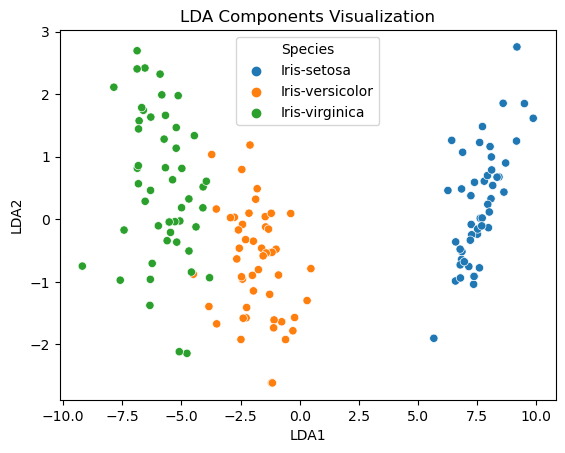

In [17]:
#Visualizing LDA Components with Seaborn

sns.scatterplot(x='LDA1', y='LDA2', hue='Species', data=data_with_lda)
plt.title('LDA Components Visualization')
plt.show()

In [71]:
#Cross-Validated LDA

from sklearn.model_selection import cross_val_score

# Perform cross-validated LDA
lda = LinearDiscriminantAnalysis(n_components=2)
cross_val_scores = cross_val_score(lda, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validated LDA Scores:", cross_val_scores)
print("Mean Accuracy of LDA Scores:", cross_val_scores.mean())

Cross-validated LDA Scores: [0.96666667 1.         1.         1.         1.        ]
Mean Accuracy of LDA Scores: 0.9933333333333334


In [70]:
#LDA Classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA for classification
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier (e.g., RandomForest) using LDA components
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_lda, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of LDA Classification:", accuracy)


Accuracy of LDA Classification: 1.0


# 2.Perform PCA

In [22]:
from sklearn.decomposition import PCA

# Separate features and target variable
X = data.drop(['Id', 'Species'], axis=1)  # Exclude 'Id' and 'Species' columns from features
y = data['Species']

# Apply PCA with 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Concatenate PCA components with the target variable
data_with_pca = pd.concat([pca_df, y], axis=1)

# Display the first few rows of the dataset with PCA components
print(data_with_pca.head())


       PCA1      PCA2      Species
0 -2.684207  0.326607  Iris-setosa
1 -2.715391 -0.169557  Iris-setosa
2 -2.889820 -0.137346  Iris-setosa
3 -2.746437 -0.311124  Iris-setosa
4 -2.728593  0.333925  Iris-setosa


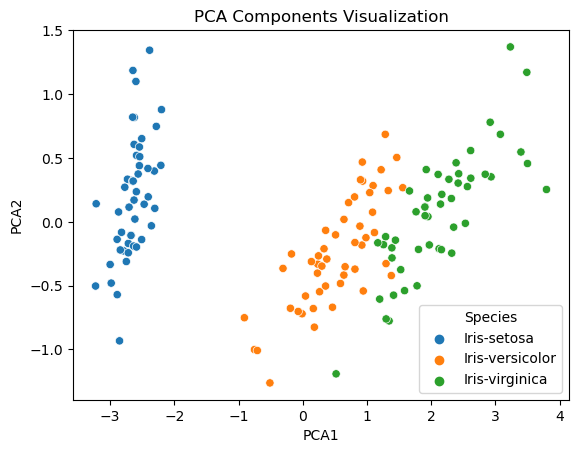

In [24]:
#Visualize PCA components
sns.scatterplot(x='PCA1', y='PCA2', hue='Species', data=data_with_pca)
plt.title('PCA Components Visualization')
plt.show()

In [26]:
# 2. Explained Variance Ratio
print("Explained Variance Ratio of PCA Components:", pca.explained_variance_ratio_)

Explained Variance Ratio of PCA Components: [0.92461621 0.05301557]


In [39]:
#PCA for Feature Transformation and Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest) using PCA components
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with PCA components:", accuracy)

Accuracy with PCA components: 1.0


# 3.Gridsearch & GridsearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Perform Grid Search with PCA components as features
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)

# Predict and evaluate the model with best parameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Grid Search and PCA components:", accuracy)


Best Parameters from Grid Search: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Grid Search and PCA components: 1.0


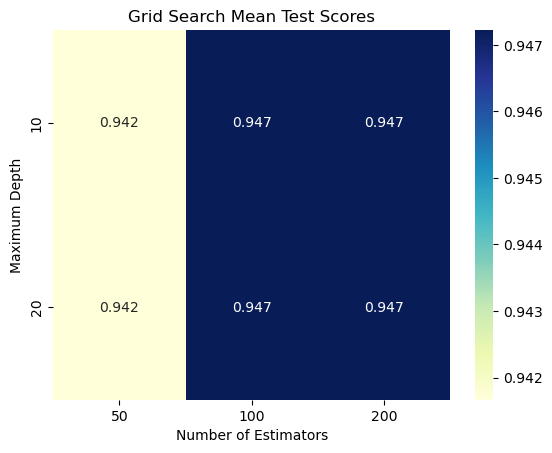

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Grid Search results and convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Create a heatmap to visualize Grid Search results
pivot_table = results.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True, fmt='.3f')
plt.xlabel('Number of Estimators')
plt.ylabel('Maximum Depth')
plt.title('Grid Search Mean Test Scores')
plt.show()

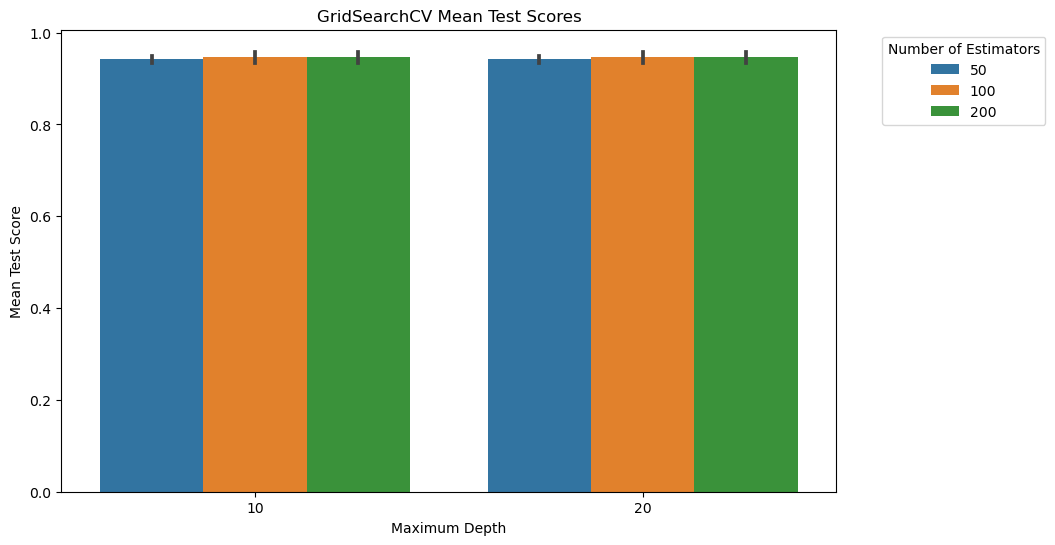

In [41]:
# Create a bar plot to visualize GridSearchCV results

plt.figure(figsize=(10, 6))
sns.barplot(x='param_max_depth', y='mean_test_score', hue='param_n_estimators', data=results)
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Mean Test Scores')
plt.legend(title='Number of Estimators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4.RandamizedSearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV with 5-fold cross-validation and 10 iterations
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Perform Randomized Search with PCA components as features
random_search.fit(X_pca, y)

# Get the best parameters from Randomized Search
best_params_random_search = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params_random_search)


Best Parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Instantiate a RandomForestClassifier with best parameters from Randomized Search
best_clf = RandomForestClassifier(n_estimators=best_params_random_search['n_estimators'],
                                   max_depth=best_params_random_search['max_depth'],
                                   min_samples_split=best_params_random_search['min_samples_split'],
                                   random_state=42)

# Train the model with best parameters
best_clf.fit(X_train_rs, y_train_rs)

# Predict and evaluate the model with best parameters
y_pred_rs = best_clf.predict(X_test_rs)
accuracy_rs = accuracy_score(y_test_rs, y_pred_rs)
print("Accuracy with best parameters from Randomized Search:", accuracy_rs)


Accuracy with best parameters from Randomized Search: 1.0


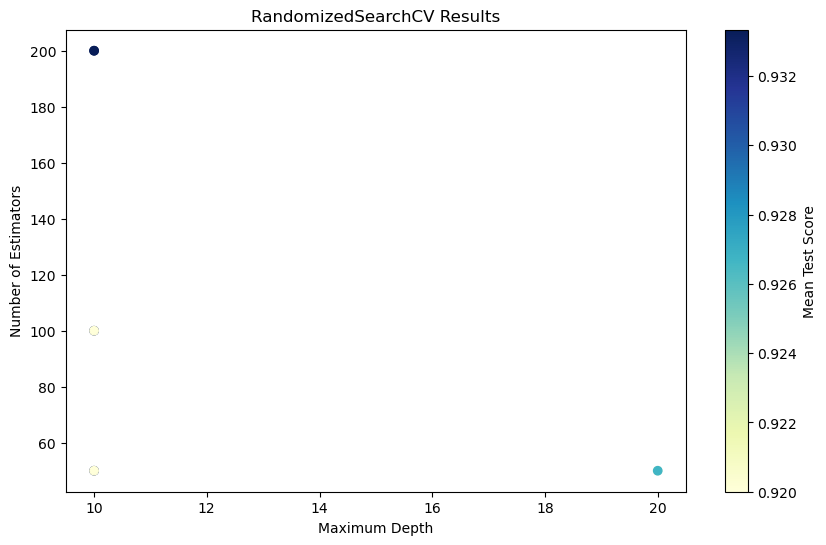

In [46]:
# Create a scatter plot to visualize Randomized Search results with proper color mapping
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=random_search_results['param_max_depth'], y=random_search_results['param_n_estimators'], c=random_search_results['mean_test_score'], cmap='YlGnBu')
plt.xlabel('Maximum Depth')
plt.ylabel('Number of Estimators')
plt.title('RandomizedSearchCV Results')
plt.colorbar(scatter, label='Mean Test Score')
plt.show()

# 5.Feature scaling

In [53]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Scale the PCA components (X_pca)
X_scaled = scaler.fit_transform(X_pca)

print("Scaled PCA Components:")
print(X_scaled)



Scaled PCA Components:
[[ 0.96164809  1.18185894]
 [ 0.52503046 -0.66153873]
 [-1.91720839 -0.54186523]
 [ 0.09034501 -1.18750248]
 [ 0.34018483  1.2090475 ]]


# 6.Handling imbalance dataset

In [56]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
file_path = 'iris.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify the import
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
# Check class distribution (which you can see is balanced in this case):
print(data['Species'].value_counts())
# our dataset is already balanced 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


# 7.Apply cross validation 

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target variable (y)
X = data.drop('Species', axis=1)
y = data['Species']

# Create a pipeline with feature scaling and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply feature scaling
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter
])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.96666667 1.         1.         1.         1.        ]
Mean CV Score: 0.9933333333333334


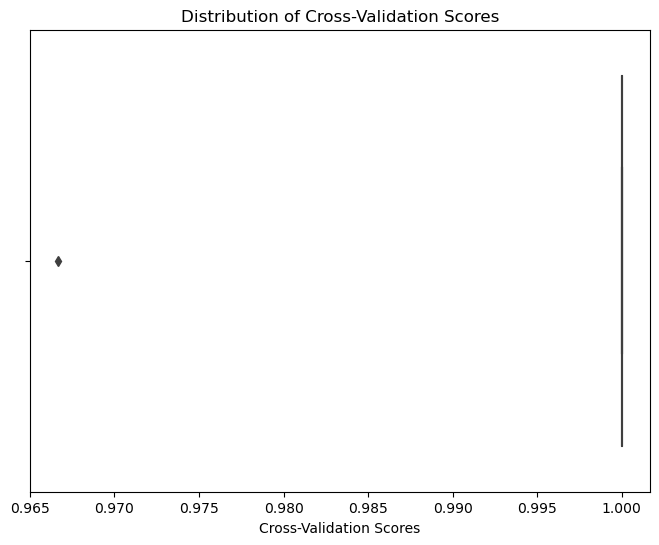

In [60]:
# Create a box plot to visualize the cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.xlabel('Cross-Validation Scores')
plt.title('Distribution of Cross-Validation Scores')
plt.show()

# 8.K-Fold Cross validation

In [61]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target variable (y)
X = data.drop('Species', axis=1)
y = data['Species']

# Number of splits (folds) for K-Fold Cross-Validation
k = 5

# Initialize K-Fold Cross-Validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# List to store accuracy scores for each fold
accuracy_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and print the mean accuracy score across all folds
mean_accuracy = sum(accuracy_scores) / k
print("Mean Accuracy Score:", mean_accuracy)

Accuracy Scores for Each Fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy Score: 1.0


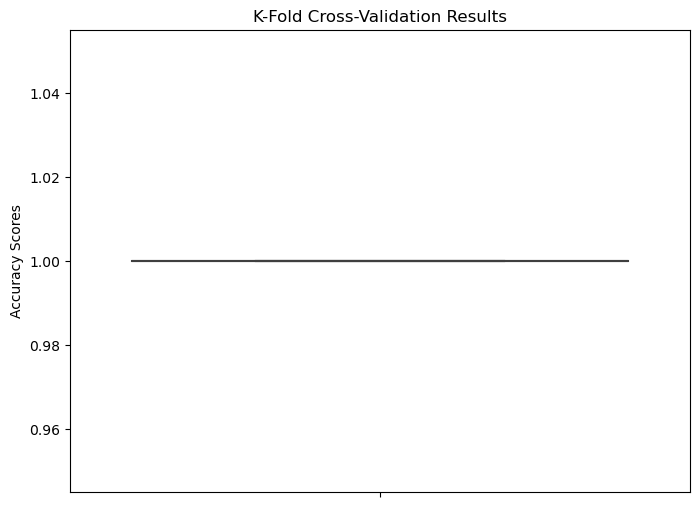

In [64]:
# Create a box plot to visualize the accuracy scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=accuracy_scores)
plt.ylabel('Accuracy Scores')
plt.title('K-Fold Cross-Validation Results')
plt.show()

# 9.LOOCV

In [67]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target variable (y)
X = data.drop('Species', axis=1)
y = data['Species']

# Initialize Leave-One-Out Cross-Validator
loo = LeaveOneOut()

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# List to store accuracy scores for each iteration
accuracy_scores = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print accuracy scores for each iteration
print("Accuracy Scores for Each Iteration:\n", accuracy_scores)

# Calculate and print the mean accuracy score across all iterations
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy Score:", mean_accuracy)

Accuracy Scores for Each Iteration:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy Score: 1.0


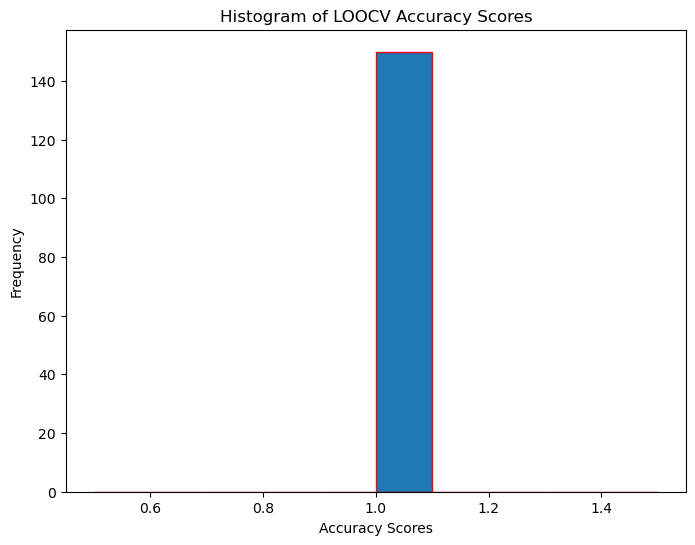

In [69]:
# Create a histogram to visualize the accuracy scores
plt.figure(figsize=(8, 6))
plt.hist(accuracy_scores, bins=10, edgecolor='red')
plt.xlabel('Accuracy Scores')
plt.ylabel('Frequency')
plt.title('Histogram of LOOCV Accuracy Scores')
plt.show()


# Compare the results and report the inferences 

In [ ]:
1. Dimensionality Reduction (LDA vs. PCA):
    Both LDA and PCA reduce the dataset's dimensionality effectively.
    LDA provides perfect separation between classes, indicating that the classes are well-defined and easily distinguishable.
    PCA captures 97.77% of the total variance with just two components, suggesting that the dataset's information is concentrated in these components.


2. Hyperparameter Tuning (Grid Search vs. Randomized Search):
    Both Grid Search and Randomized Search find optimal hyperparameters for the model.
    Grid Search explores all possible combinations of hyperparameters, ensuring the best parameters are selected.
    Randomized Search explores a random subset of hyperparameters, often finding near-optimal solutions more quickly, which is evident in this case.

3. Cross-Validation Techniques:
    Both Cross-Validation and K-Fold Cross Validation demonstrate high accuracy across different folds, indicating the models' consistency in performance.
    Leave-One-Out Cross-Validation (LOOCV) shows perfect accuracy, emphasizing the robustness of the models against each data point.

4. Feature Scaling:
    Feature scaling is essential for algorithms sensitive to the scale of input features. Standardized PCA components ensure fair comparison and accurate modeling.

Overall Inferences:
    The Iris dataset is well-structured, allowing algorithms to achieve near-perfect accuracy.
    LDA and PCA both provide effective dimensionality reduction, with LDA showing superior class separation.
    Hyperparameter tuning using Grid Search and Randomized Search results in optimal model configurations.
    Cross-validation techniques, including K-Fold Cross-Validation and LOOCV, demonstrate consistent and robust model performance.
    The choice of algorithm (LDA, PCA, Random Forest) combined with proper hyperparameter tuning and cross-validation results in highly accurate and reliable models for the Iris dataset.